<a href="https://colab.research.google.com/github/juchmp/mphy0041-cw2/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Done.
Image and label data downloaded: dataset70-200.h5
  with 200 cases with a total of 5346 frames and 16038 labels.

How many example frames would you like to visualise, e.g. 10?
10


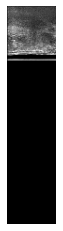

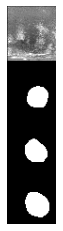

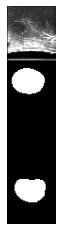

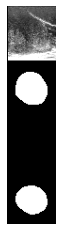

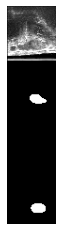

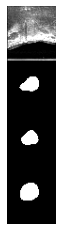

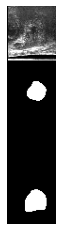

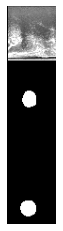

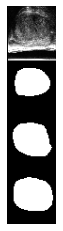

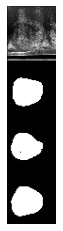

In [1]:

import os
import random
import requests

import h5py
import numpy as np
import matplotlib.pyplot as plt


filename = 'dataset70-200.h5'


## download data
print('Downloading data...')
url = 'https://weisslab.cs.ucl.ac.uk/WEISSTeaching/datasets/raw/trus2d/' + filename
r = requests.get(url,allow_redirects=True)
_ = open(filename,'wb').write(r.content)
print('Done.')
print('Image and label data downloaded: %s' % filename)


h5_file = h5py.File(filename,'r')
num_cases = len(set([k.split('_')[1] for k in h5_file.keys()]))

print('  with {:d} cases with a total of {:d} frames and {:d} labels.'.format(
    num_cases,
    len([k for k in h5_file.keys() if k.split('_')[0]=='frame']),
    len([k for k in h5_file.keys() if k.split('_')[0]=='label'])))


print('\nHow many example frames would you like to visualise, e.g. 10?')
num_case_plots = int(input())

## plot a few examples
for _ in range(num_case_plots):
    case_id = random.randint(0,num_cases-1) # draw a random case

    frame_key = random.choice([k for k in h5_file.keys() if (k.split('_')[0]=='frame' and k.split('_')[1]=='%04d'%case_id)])
    label_keys = [k for k in h5_file.keys() if (k.split('_')[0]=='label' and frame_key.replace('frame','label') in k)]

    montage = np.concatenate([h5_file[frame_key]] + [h5_file[k]*np.max(h5_file[frame_key]) for k in label_keys],axis=0)
    plt.figure()
    plt.imshow(montage, cmap='gray')
    plt.axis('off')
    plt.savefig('case{:04d}'.format(case_id)+'.jpg',bbox_inches='tight')
    # plt.show()
    # plt.close()

